# Functions

Seho Jeong, Sogang University

**References**
- **Perla, Jesse, Thomas J. Sargent, and John Stachurski. n.d.** "Quantitative Economics with Julia." QuantEcon.

In [28]:
using LinearAlgebra, Statistics, Plots

## User-Defined Functions

Let's talk a about user-defined functions. User-defined functions are important for improving clarity of your code by (1) separating different strands of logic, and (2) facilitating code reuse (writing the same thing twice is always a bad idea). 

Julia functions are convenient. Any number of functions can be defined in a given file. Any value can be passed to a function as an argument, including other functions. Functions can be (and often are) defined inside other functions. A function can return any kind of value, including functions.

### Return Statement

In Julia, the `return` statement is optional, so that the following functions have identical behavior.

In [8]:
function f1(a, b)
    return a * b
end

function f2(a, b)
    a * b
end

f2 (generic function with 1 method)

When no return statement is present, the last value obtained when executing the code block is returned. Although some prefer the second option, we often favor the former on the basis that explicit is better than implicit. 

A function can have arbitrarily many `return` statements, with execution terminating when the first return is hit. You can see this in action when experimenting with the following funtion.

In [9]:
function foo(x)
    if x > 0
        return "Positive"
    end
    return "Non-Positive"
end

foo (generic function with 1 method)

In [10]:
foo(3)

"Positive"

In [11]:
foo(-3)

"Non-Positive"

### Other Syntax for Defining Functions

For short function definitions Julia offers some attractive simplified syntax. First, when the function body is a simple expression, it can be defined without the `function` keyword or `end`.

In [12]:
f(x) = sin(1 / x)

f (generic function with 2 methods)

Let's check that it works.

In [13]:
f(1 / π)

1.2246467991473532e-16

Julia also allows you to defined anonymous functions. For example, to define `f(x) = sin(1 / x)` you can use `x -> sin(1 / x)`. The difference is that the second function has no name bound to it. How can you use a function with no name? Typically it's as an argument to another function.

In [14]:
map(x -> sin(1 / x), randn(3)) # apply function to each element

3-element Vector{Float64}:
  0.9839182693935972
 -0.6082419343893112
  0.9572334666167178

### Optional and Keyword Arguments

Function arguments can be given default values.

In [15]:
f(x, a=1) = exp(cos(a * x))

f (generic function with 2 methods)

If the argument is not supplied, the default value is substituted.

In [16]:
f(pi)

0.36787944117144233

In [17]:
f(pi, 2)

2.718281828459045

Another option is to use keyword arguments. The difference between keyword and standard (positional) arguments is that they are parsed and bounded by name rather than the order in the function call. For example, in the call

In [18]:
f(x; a=1) = exp(cos(a * x)) # note the ; in the definition
f(pi; a=2)

2.718281828459045

The `;` in this case for calling the function is optional and the last line could equivalently be `f(pi, a=2)`. That said separating keyword arguments `;` is encouraged to clarify the types of arguments, and enables some nice features. For example, local variables used as keyword arguments (or in named tuples) by default pass in the same name.

In [19]:
a = 2
f(pi; a) # equivalent to f(pi; a=a)

2.718281828459045

While it may seem terse at first, this pattern is common across Julia and is worth getting used to. If you see an argument in Julia to the right of the `;` assume it is a keyword argument with the name matching the value. The automatic naming of keyword arguments is also picked up automatically when they are fields in named tuples or structs.

In [20]:
nt = (; a=2, b=10)
f(pi; nt.a) # equivalent to f(pi; a=nt.a)

2.718281828459045

## Broadcasting

A common scenario in computing is that

- we have a function `f` such that `f(x)` returns a number for any number `x`
- we wish to apply `f` to every element of an iterable `x_vec` to produce a new result `y_vec`.

In Julia loops are fast and we can do this easily enough with a loop. For example, suppose that we want to apply `sin` to `x_vec = [2.0, 4.0, 6.0, 8.0]`. The following code will do the job.

In [21]:
x_vec = [2.0, 4.0, 6.0, 8.0]
y_vec = similar(x_vec)
for (i, x) in enumerate(x_vec)
    y_vec[i] = sin(x)
end
y_vec

4-element Vector{Float64}:
  0.9092974268256817
 -0.7568024953079282
 -0.27941549819892586
  0.9893582466233818

or alternatively just iterating with indicies.

In [22]:
x_vec = [2.0, 4.0, 6.0, 8.0]
y_vec = similar(x_vec)
for i in eachindex(x_vec)
    y_vec[i] = sin(x_vec[i])
end
y_vec

4-element Vector{Float64}:
  0.9092974268256817
 -0.7568024953079282
 -0.27941549819892586
  0.9893582466233818

But this is a bit unwieldly so Julia offers the alternative syntax.

In [23]:
y_vec = sin.(x_vec)

4-element Vector{Float64}:
  0.9092974268256817
 -0.7568024953079282
 -0.27941549819892586
  0.9893582466233818

More generally, if `f` is any Julia function, then `f.` references the broadcasted version. Conveniently, this applies to user-defined functions as well. To illustrate, let's write a function `chisq(k)` returns a chi-squared random variable with `k` degrees of freedom when `k` is an integer. In doing this we'll exploit the fact that, if we take `k` independent standard normals, square them all and sum, we get a chi-squared with `k` degrees of freedom.

In [24]:
function chisq(k)
    @assert k > 0
    z = randn(k)
    return sum(z -> z^2, z) # same as `sum(x^2 for x in z)`
end

chisq (generic function with 1 method)

The macro `@assert` will check that the next expression evaluates to `true`, and will stop and display an error otherwise.

In [25]:
chisq(3)

4.071841136125328

Note that calls with integers less than 1 will trigger an assertion failure inside the function body.

In [26]:
chisq(-2)

AssertionError: AssertionError: k > 0

Let's try this out on an array of integers, adding the broadcast.

In [27]:
chisq.([2, 4, 6])

3-element Vector{Float64}:
  7.834416291454931
  2.062093179165401
 12.7143142008434

The broadcasting notation is not simply vectorization, as it is able to "fuse" multiple broadcasts together to generate efficient code.

In [28]:
x = 1.0:1.0:5.0
y = [2.0, 4.0, 5.0, 6.0, 8.0]
z = similar(y)

z .= x .+ y .- sin.(x) # generates efficient code instead of many temporaries

5-element Vector{Float64}:
  2.1585290151921033
  5.090702573174318
  7.858879991940133
 10.756802495307928
 13.958924274663138

A convenience macro for adding broadcasting on every function call is `@.`.

In [29]:
@. z = x + y - sin(x)

5-element Vector{Float64}:
  2.1585290151921033
  5.090702573174318
  7.858879991940133
 10.756802495307928
 13.958924274663138

Since the `+`, `-`, `=` operators are functions, behind the scenes this is broadcasting against both the `x` and `y` vectors. The compiler will fix anything which is a scalar, and otherwise iterate across every vector.

In [30]:
f(a, b) = a + b # bivariate function
a = [1 2 3]
b = [4 5 6]

@show f.(a, b)  # across both
@show f.(a, 2); # fix scalar for second

f.(a, b) = [5 7 9]
f.(a, 2) = [3 4 5]


The compiler is only able to detect "scalar" values in this way for a limited number of types (e.g., integers, floating point numbers, etc) and some packages (e.g., Distributions). For other types, you will need to wrap any scalars in `Ref` to fix them, or else it will try to broadcast the value. Another place that you may use a `Ref` is to fix a function parameter you do not want to broadcast over.

In [41]:
f(x, y) = [1, 2, 3] ⋅ x + y       # "⋅" can be typed by \cdot<TAB>
@show f([3, 4, 5], 2)             # use vector as first parameter
@show f.(Ref([3, 4, 5]), [2, 3]); # broadcasting over 2nd parameter, fixing first

f([3, 4, 5], 2) = 28
f.(Ref([3, 4, 5]), [2, 3]) = [28, 29]


## Scoping and Closures

Since global variables are usually a bad idea, we will concentrate on understanding the role of good local scoping practice. That said, while many of the variables in these Jupyter notebook are global, we have been careful to write the code so that the entire code could be copied inside of a function. When copied inside a function, variables become local and functions become closures.

Caveats. For/While loops and global variables in Jupyter vs. the REPL:
- In the current version of Julia, there is a disctinction between the use of scope in an interactive Jupyter environment.
- The description here of globals applies to Jupyter notebooks, and may also apply to the REPL and top-level scripts.
- In general, you should be creating functions when working with `.jl` files, and the distinction generally won't apply.

For more information on using globals outside of Jupyter, see [variable scoping documentation](https://docs.julialang.org/en/v1/manual/variables-and-scoping/), though these rules are likely to become consistent in a future version.

### Functions

The scope of a variable name determines where it is valid to refer to it, and how clashes between names can occur. Think of the scope as a list of all of the name bindings of relevant variables. Different scopes could contain the same name but be assigned to different things. An obvious place to start is to notice that functions introduce their own local names.

In [1]:
f(x) = x^2 # local `x` in scope

# x is not bound to anything in this outer scope
y = 5
f(y)

25

This would be roughly equivalent to

In [2]:
function g() # scope within the `g` function
    f(x) = x^2 # local `x` in scope

    # x is not bound to anything in this outer scope
    f(y)
end
g() # run the function

25

This is also equivalent if the `y` was changed to `x`, since it is a different scope.

In [3]:
f(x) = x^2 # local `x` in scope

# x is not bound to anything in this outer scope
x = 5 # a different `x` than the local variable name
f(x)  # calling `f` with `x`

25

The scoping also applies to named arguments in functions.

In [4]:
f(x; y=1) = x + y # `x` and `y` are names local to the `f` function
xval = 0.1
yval = 2
f(xval; y=yval)

2.1

Due to scoping, you could write this as

In [6]:
f(x; y=1) = x + y # `x` and `y` are names local to the `f` function
x = 0.1
y = 2
f(x; y)

2.1

As always, the `f(x; y)` is equivalent to `f(x; y=y)`. Similarly to named arguments, the local scope also works with named tuples.

In [9]:
xval = 0.1
yval = 2
@show (; x=xval, y=yval) # named tuple with names `x` and `y`

x = 0.1
y = 2

# Create a named tuple with names `x` and `y` local to the tuple
@show (; x=x, y=y)

# better yet
@show (; x, y);

(; x = xval, y = yval) = (x = 0.1, y = 2)
(; x = x, y = y) = (x = 0.1, y = 2)
(; x, y) = (x = 0.1, y = 2)


As you use Julia, you will find that scoping is very natural and that there is no reason to avoid using `x` and `y` in both places. In fact, it frequently leads to clear code closer to the math when you don't need to specify intermediaries. Another example is with broadcasting.

In [11]:
f(x) = x^2 # local `x` in scope

x = 1:5    # not an integer

f.(x)      # broadcasts the x^2 function over the vector

5-element Vector{Int64}:
  1
  4
  9
 16
 25

### Closures

Frequently, you will want to have a function that calculates a value given some fixed parameters.

In [12]:
f(x, a) = a * x^2
f(1, 0.2)

0.2

While the above was convenient, there are other times when you want to simply fix a variable or refer to something already calculated.

In [13]:
a = 0.2
f(x) = a * x^2 # refers to the `a` in the outer scope
f(1)           # univariate function

0.2

When the function `f` is parsed in Julia, it will look to see if any of the variables are already defined in the current scope. In this case, it finds the `a` since it was defined previously, whereas if the code defines `a = 0.2` after the `f(x)` definition, it would fail. This also works when embedded in other functions.

In [14]:
function g(a)
    f(x) = a * x^2 # refers to the `a` passed in the function
    f(1)
end
g(0.2)

0.2

Comparing the two: the key here is not that `a` is a global variable, but rather that the `f` function is defined to capture a variable from an outer scope. This is called a **closure**, and are used throughout the lectures. It is generally bad practice to modify the captured variable in the function, but otherwise the code becomes very clear. One place where this can be helpful is in a string of dependent calculations. For example, if you wanted to calculate a `(a, b, c)` from `a = f(x)`, `b = g(a)`, `c = h(a, b)` where $f(x) = x^2$, $g(a) = 2a$, $h(a, b) = a + b$.

In [15]:
function solve_model(x)
    a = x^2
    b = 2 * a
    c = a + b
    return (; a, b, c) # note local scope of tuples    
end

solve_model(0.1)

(a = 0.010000000000000002, b = 0.020000000000000004, c = 0.030000000000000006)

Named tuple and structure parameters can then be unpacked using the reverse notation.

In [19]:
(; a, b, c) = solve_model(0.1)
println("a = $a, b = $b, c = $c")

a = 0.010000000000000002, b = 0.020000000000000004, c = 0.030000000000000006


### Higher-Order Functions

One of the benefits of working with closures and functions is that you can return them from other functions. This leads to some natural programming patterns we have already been using, where we can use functions of functions and functions returning functions (or closures). To see a simple example, consider functions that accept other functions (including closures).

In [23]:
twice(f, x) = f(f(x)) # applies f to itself twice
f(x) = x^2
@show twice(f, 2.0)   # equivalent to twice(x -> x^2, 2.0)

a = 5
g(x) = a * x
@show twice(g, 2.0);  # using a closure

twice(f, 2.0) = 16.0
twice(g, 2.0) = 50.0


This pattern has already been used extensively in our code and is key to keeping things like interpolation, numerical integration, and plotting. An example is for a function that returns a closure itself.

In [25]:
function multiplyit(a, g)
    return x -> a * g(x) # function with `g` used in closure
end

f(x) = x^2
h = multiplyit(2.0, f)   # returns function which doubles the result
h(2)                     # returned function is like any other function

8.0

You can create and define using `function` as well.

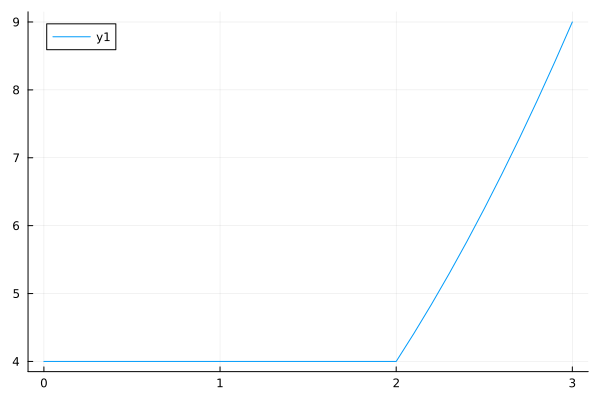

In [34]:
function snapabove(g, a)

    function f(x)
        if x > a        # `a` is captured in the closure `f`
            return g(x)
        else
            return g(a)
        end
    end

    return f # closure with the embedded `a`
end

f(x) = x^2
h = snapabove(f, 2.0)
plot(h, 0.0:0.1:3.0)

The above van be written more succintly using the ternary operation, i.e., `a ? b : c` which returns `b` if `a` is true and `c` otherwise.

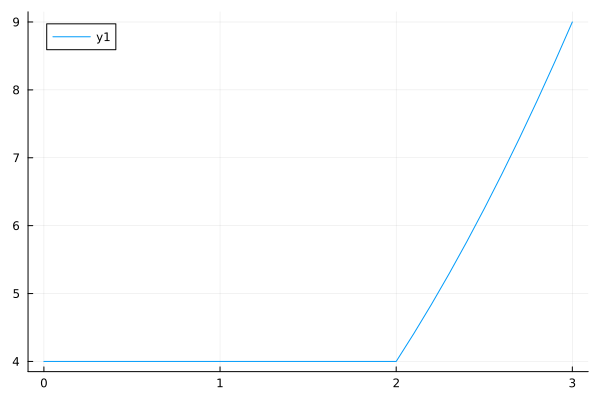

In [38]:
function snapabove2(g, a)
    return x -> x > a ? g(x) : g(a)
end

plot(snapabove2(f, 2.0), 0.0:0.1:3.0)

### Loops

The `for` and `while` loops also introduce a local scope, and you can roughly reason about them the same way you would a function or closure. In particular, 

In [42]:
for i in 1:2 # introduces local `i`
    dval1 = i
    println(i)
end

# @show (i, dval1) # would fail as neither exists in this scope

for i in 1:2 # introduces a different local `i`
    println(i)
end

1
2
1
2


On the other hand just as with closures, if a variable is already defined it will be available in the inner scope.

In [45]:
dval2 = 0     # introduces variables

for i in 1:2  # introduces local `i`
    dval2 = i # refers to outer variable
end

dval2         # still can't refer to `i` itself

2

Similarly, for while loops

In [50]:
val = 1.0
tol = 0.002

while val > tol
    old = val 
    val = val / 2
    difference = val - old
end

@show val; # @show difference fails, since not in scope

val = 0.001953125


### A Quick Check for Scoping Design

While we have argued against global variables as poor practice, you may have noticed that in Jupyter notebooks we have been using them throughout. Here, global variables are used in an interactive editor because they are convenient, and not because they are essential to the design of functions. A simple test of the difference is to take a segment of code and wrap it in a function, for example

In [51]:
x = 2.0
f(y) = x + y
z = f(4.0)

for i in 1:3
    z += i
end

println("z = $z")

z = 12.0


Here, the `x` and `z` are global variables, the function `f` refers to the global variable `x`, and the global variable `z` is modified in the `for` loop. However, you can simply wrap the entire code in a function.

In [53]:
function wrapped()
    x = 2.0
    f(y) = x + y
    z = f(4.0)

    for i in 1:3
        z += i
    end

    println("z = $z")
end

wrapped()

z = 12.0


Now there are no global variables. While it is convenient to skip wrapping our code throughout, in general you will want to wrap any performance sensitive code in this way.